# Pymaceuticals Inc.
---

### Analysis

- There are 10 different drugs used for treatment analysis of the mice. Of those, Capomulin was the most heavily used, while Propriva was the least used. 
- The distribution between sexes of mice is almost identical, with males outweighing females by 2%. Given the data provided and analyzed, there isn't any data shown based on the differences between sex distribution across all mice.
- According to the box plot graph, after analyzing the treatement of the four provided drugs, the final results of tumor volume trended lower between the Capomulin and Ramicane compared to the Infubinol and Ceftamin. However, there were a couple of lower outliers found in both of the first two (Ramicane, Capomulin) drugs that could be the result of experimental error.
- The treatment plan for Mouse ID l509, which used Capolmulin, had its tumor volume decrease with time, as showcased by the corresponding line graph.
- Given the scatterplot, "Capomulin Treatment: Weight vs. Avg Tumor Volume", there was a strong-positive correlation between mouse weight and tumor volume with a value of 0.84. 

In [225]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_study_combined = pd.merge(study_results, mouse_metadata, how = 'outer', on = 'Mouse ID')

# Display the data table for preview
mice_study_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [226]:
# Checking the number of mice.
total_mice = len(mice_study_combined['Mouse ID'].unique())

print(f" The total number of mice is {total_mice}.")

 The total number of mice is 249.


In [227]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mice_study_combined.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)
duplicate_mice_id = mice_study_combined.loc[duplicate_mice, 'Mouse ID'].unique()

duplicate_mice_id

array(['g989'], dtype=object)

In [228]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id_data = mice_study_combined.loc[mice_study_combined['Mouse ID'] == duplicate_mice_id[0]]
duplicate_mice_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [229]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_table = mice_study_combined.drop(duplicate_mice_id_data.index)
clean_mice_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [230]:
# Checking the number of mice in the clean DataFrame.
clean_unique_id = len(clean_mice_table['Mouse ID'].unique())
clean_unique_id

print(f"After dropping the duplicate mouse, the unique number of mice is {clean_unique_id}.")

After dropping the duplicate mouse, the unique number of mice is 248.


## Summary Statistics

In [231]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_regimen = clean_mice_table.groupby('Drug Regimen')
mean = grouped_regimen['Tumor Volume (mm3)'].mean()
median = grouped_regimen['Tumor Volume (mm3)'].median()
variance = grouped_regimen['Tumor Volume (mm3)'].var()
std = grouped_regimen['Tumor Volume (mm3)'].std()
sem = grouped_regimen['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Variance Tumor Volume": variance,
    "Standard Deviation Tumor Volume": std,
    "SEM Tumor Volume": sem
})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [232]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregate = clean_mice_table.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_aggregate_df = summary_aggregate.rename(columns={'mean':"Total Mean", 
                                                              'median': "Total Median", 
                                                              'var': "Variance", 
                                                              'std': "Standard Deviation", 
                                                              'sem': "SEM"})

summary_aggregate_df

Tumor Volume (mm3)                                             \
                     Total Mean Total Median   Variance Standard Deviation   
Drug Regimen                                                                 
Capomulin             40.675741    41.557809  24.947764           4.994774   
Ceftamin              52.591172    51.776157  39.290177           6.268188   
Infubinol             52.884795    51.820584  43.128684           6.567243   
Ketapril              55.235638    53.698743  68.553577           8.279709   
Naftisol              54.331565    52.509285  66.173479           8.134708   
Placebo               54.033581    52.288934  61.168083           7.821003   
Propriva              52.320930    50.446266  43.852013           6.622085   
Ramicane              40.216745    40.673236  23.486704           4.846308   
Stelasyn              54.233149    52.431737  59.450562           7.710419   
Zoniferol             53.236507    51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

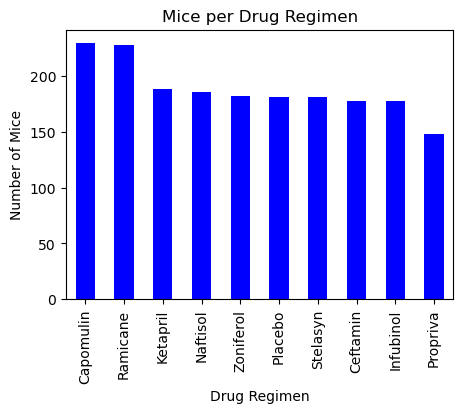

In [233]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_per_drug = clean_mice_table.groupby(['Drug Regimen']).count()['Mouse ID'].sort_values(ascending=False)

mice_per_drug.plot(kind = "bar", figsize = (5, 3.5), title = "Mice per Drug Regimen", color = "blue") 
plt.ylabel("Number of Mice")
plt.savefig("./drug_regimen_pandas.png")
plt.show()

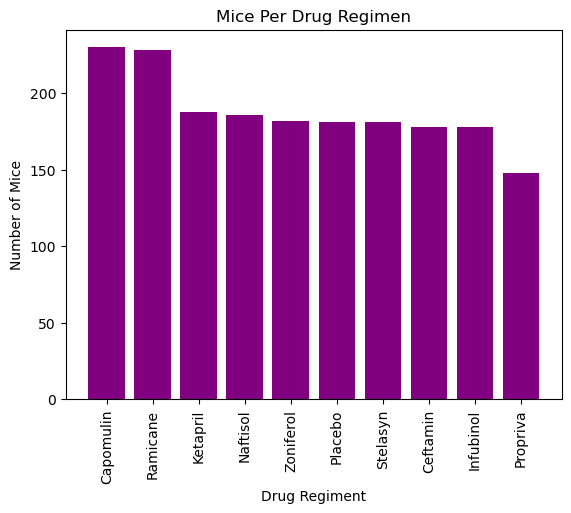

In [234]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange(len(mice_per_drug))
y_axis=(clean_mice_table.groupby(['Drug Regimen'])['Mouse ID'].count()).sort_values(ascending=False)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_per_drug.index.values, rotation = "vertical")

plt.bar(x_axis, y_axis, color = 'purple', alpha = 1, align = "center") 
plt.title("Mice Per Drug Regimen")
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Mice")
plt.savefig("./drug_regimen_pyplot.png")
plt.show()

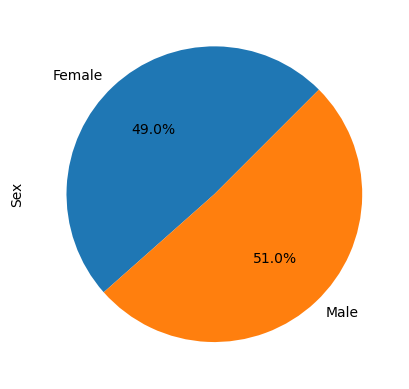

In [235]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_sex = clean_mice_table.groupby('Sex')['Sex'].count()

mice_sex_pie = mice_sex.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.savefig("./sex_pandas.png")

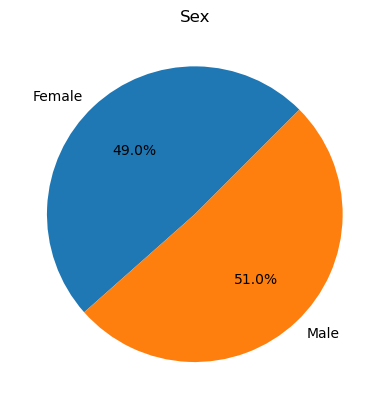

In [236]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = mice_sex.index

# Create pie chart
py_bar_mice_sex = plt.pie(mice_sex, labels = mice_sex.index, autopct = "%1.1f%%", startangle = 45)
plt.title('Sex')
plt.savefig("./sex_pandas.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [237]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mice_table.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge = greatest_timepoint.merge(clean_mice_table, on = ['Mouse ID', 'Timepoint'], how = 'left')
merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [238]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = clean_mice_table.loc[clean_mice_table['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_vol.loc[(tumor_vol < lower_bound) 
                  | (tumor_vol > upper_bound)]

    print(f"Average tumor volume for {drug} is: {round(mean,2)}")
    print(f"Final tumor volume for {drug} below {round(lower_bound,2)} could be an outlier.")
    print(f"Final tumor volume for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor #{i} volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')

Average tumor volume for Capomulin is: 40.68
Final tumor volume for Capomulin below 26.71 could be an outlier.
Final tumor volume for Capomulin above 55.97 could be outliers.
Number of outliers for Capomulin is: 2
Outlier final tumor #1699 volume(mm3) is 25.47
Outlier final tumor #1700 volume(mm3) is 23.34
----------------------------------------------------------
Average tumor volume for Ramicane is: 40.22
Final tumor volume for Ramicane below 24.19 could be an outlier.
Final tumor volume for Ramicane above 57.49 could be outliers.
Number of outliers for Capomulin is: 1
Outlier final tumor #514 volume(mm3) is 22.05
----------------------------------------------------------
Average tumor volume for Infubinol is: 52.88
Final tumor volume for Infubinol below 32.31 could be an outlier.
Final tumor volume for Infubinol above 72.32 could be outliers.
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Average tumor volume for Ceftamin is: 52.59


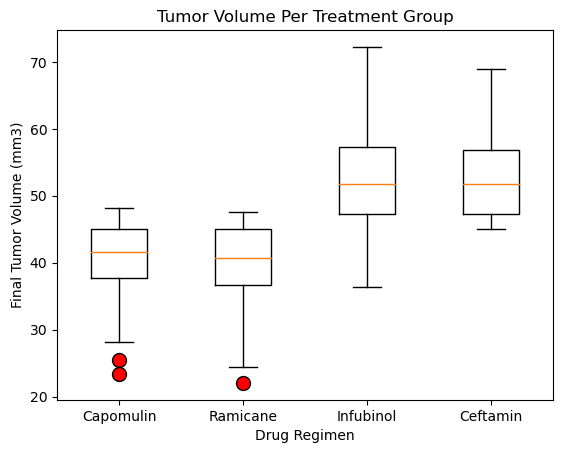

In [239]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Per Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data, labels = treatments, vert=True, flierprops={'markerfacecolor':'r', 'markersize': 10})
plt.savefig("./tumor_box_plot.png")
plt.show()

## Line and Scatter Plots

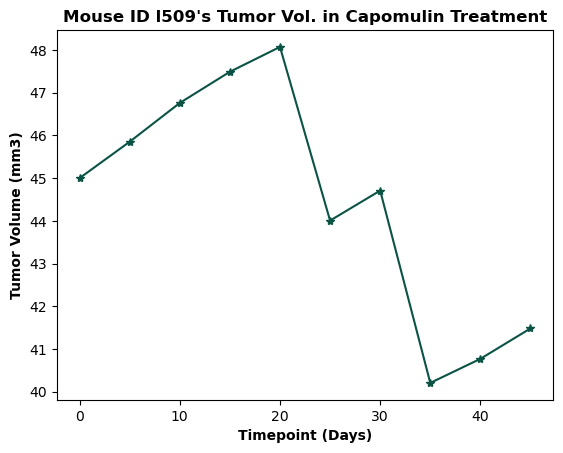

In [240]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse_df = clean_mice_table.loc[clean_mice_table['Drug Regimen'] == 'Capomulin']

mouse_id = 'l509'
mouse_df = capomulin_mouse_df.loc[capomulin_mouse_df['Mouse ID'] == mouse_id]

timepoint_tumor = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker = '*', color = '#0B5345')

plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight = 'bold')
plt.ylabel('Tumor Volume (mm3)', fontweight = 'bold')
plt.savefig("./line_plot.png")
plt.show()



C:\Users\jccro\AppData\Local\Temp\ipykernel_97368\1040308908.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_capomulin_weight = capomulin_mouse_df.groupby(['Mouse ID']).mean()['Weight (g)']
C:\Users\jccro\AppData\Local\Temp\ipykernel_97368\1040308908.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_capomulin_volume = capomulin_mouse_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']


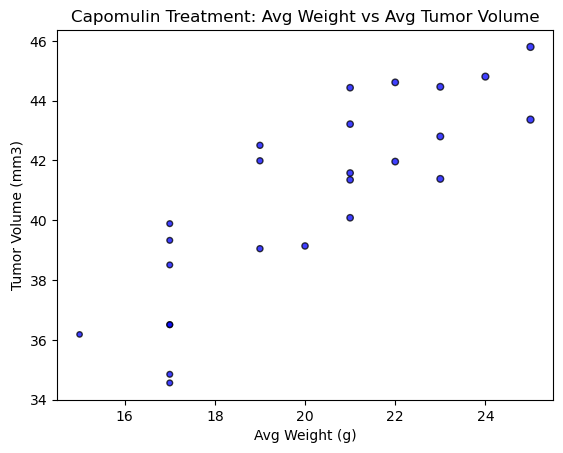

In [241]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

average_capomulin_weight = capomulin_mouse_df.groupby(['Mouse ID']).mean()['Weight (g)']
average_capomulin_volume = capomulin_mouse_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
x_axis = average_capomulin_weight
y_axis = average_capomulin_volume

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", s = x_axis, alpha = 0.75)

plt.title("Capomulin Treatment: Avg Weight vs Avg Tumor Volume")
plt.xlabel("Avg Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("./scatter_plot.png")
plt.show()

## Correlation and Regression

C:\Users\jccro\AppData\Local\Temp\ipykernel_97368\2110036516.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_capomulin_weight = capomulin_mouse_df.groupby(['Mouse ID']).mean()['Weight (g)']
C:\Users\jccro\AppData\Local\Temp\ipykernel_97368\2110036516.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_capomulin_volume = capomulin_mouse_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']


The correlation between both factors is: 0.84


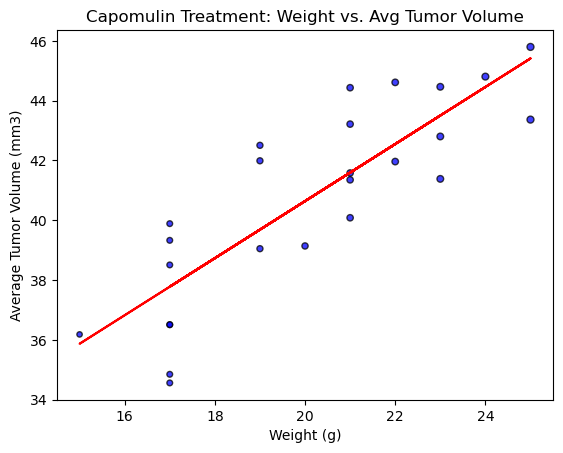

In [242]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

average_capomulin_weight = capomulin_mouse_df.groupby(['Mouse ID']).mean()['Weight (g)']
average_capomulin_volume = capomulin_mouse_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']

x_axis = average_capomulin_weight
y_axis = average_capomulin_volume

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

#correlation
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is: {round(correlation[0],2)}") 


#scatter plot
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", s = x_axis, alpha=0.75)

#labels
plt.title("Capomulin Treatment: Weight vs. Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_axis, regress_values, "r-")

plt.savefig("./correlation_regression.png")
plt.show()